In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Загрузка данных из Excel-файла и первичный анализ
target_xlsx ='https://lms.skillfactory.ru/asset-v1:SkillFactory+MIFIML-2sem+2025+type@asset+block@%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%BE%D0%B8__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%9C%D0%9E.xlsx'
df = pd.read_excel(target_xlsx)

In [38]:
# Вывод первых строк и информации о датафрейме
print(df.head())
print(df.info())

   Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0           

Датасет включает в себя 1001 запись, содержащую 214 признаков. Некоторые из ключевых характеристик включают:

- IC50, мМ — концентрация вещества, при которой наблюдается 50% ингибирование активности (измеряет эффективность лекарства), выраженная в миллимолях.

- CC50, мМ — концентрация, вызывающая гибель 50% клеток (измеряет токсичность), также в миллимолях.

- SI (селективный индекс) — определяется как отношение CC50 к IC50 и отражает терапевтическое окно.

- qed (количественная оценка "лекарственности") — количественная мера "лекарственной" ценности молекулы.

- MaxAbsEStateIndex — максимальное абсолютное значение EState-индикатора для атомов.

- MaxEStateIndex — максимальное значение EState-индикатора в молекуле.

- MinAbsEStateIndex — минимальное абсолютное значение EState-индикатора.

- MinEStateIndex — минимальное значение EState-индикатора.

- SPS (Surface Polar Score) — показатель полярности молекулярной поверхности, который иногда указывает на структурную сложность.

- fr_sulfide — указывает на присутствие сульфидной группы (–S–).

- fr_sulfonamd — указывает на наличие сульфонамидной группы (–SO₂–NH₂).

- fr_sulfone — обозначает сульфон (–SO₂–).

- fr_term_acetylene — указывает на наличие терминального ацетилена (концевая ≡C–H группа).

- fr_tetrazole — указывает на присутствие тетразольного кольца в структуре молекулы.

- fr_thiazole — содержит тиазольное кольцо.

- fr_thiocyan — указывает на тиоцианат (–SCN).

- fr_thiophene — указывает на содержание тиофена.

- fr_unbrch_alkane — указывает на неразветвленную алкановую цепь.

- fr_urea — содержит группу мочевины (–NH–CO–NH–).

Перед нами стоят несколько ключевых задач:

1. Изучить, как проводить регрессионный анализ для прогнозирования IC50, CC50 и SI.
2. Научиться классифицировать данные на основе превышения медианных значений для IC50, CC50 и SI.
3. Освоить классификацию на основе условия SI > 8.

Для упрощения анализа данных (EDA), мы разделим его на три части: каждая часть будет посвящена одному из признаков — IC50, CC50 и SI.

В качестве первого шага мы вычислим медианные значения для всех трех признаков.

In [39]:
# Вычисляем медианы для интересующих нас столбцов
medians_map = {}
columns_of_interest = ['IC50, mM', 'CC50, mM', 'SI']
for column in columns_of_interest:
    medians_map[column] = df[column].median()
print(f"Медианы: {medians_map}")

Медианы: {'IC50, mM': 46.58518345980803, 'CC50, mM': 411.0393423370522, 'SI': 3.846153846153846}


In [40]:
# Проверка на наличие пропущенных значений
nan_counts = df.isnull().sum()
print("Количество пропущенных значений:\n", nan_counts[nan_counts > 0])

Количество пропущенных значений:
 MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


В нашем датасете имеются пропуски в следующих колонках:

- MaxPartialCharge
- MinPartialCharge
- MaxAbsPartialCharge
- MinAbsPartialCharge
- BCUT2D_MWHI
- BCUT2D_MWLOW
- BCUT2D_CHGHI
- BCUT2D_CHGLO
- BCUT2D_LOGPHI
- BCUT2D_LOGPLOW
- BCUT2D_MRHI
- BCUT2D_MRLOW

В общей сложности данные с пропусками составляют лишь 3 записи, что эквивалентно 0,3% от всего объема датасета. Таким образом, эти записи можно безопасно удалить. Также мы исключим первый столбец, поскольку он не содержит значимой информации.

In [41]:
# Удаление строк с пропущенными значениями
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')  # безопасное удаление
print("После удаления пропусков:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB
После удаления пропусков:
 None


## **Анализ IC50**

In [42]:
target_column = 'IC50, mM'
print(df[target_column].describe())

count     998.000000
mean      221.118757
std       400.510657
min         0.003517
25%        12.491340
50%        45.992006
75%       224.408630
max      4128.529377
Name: IC50, mM, dtype: float64


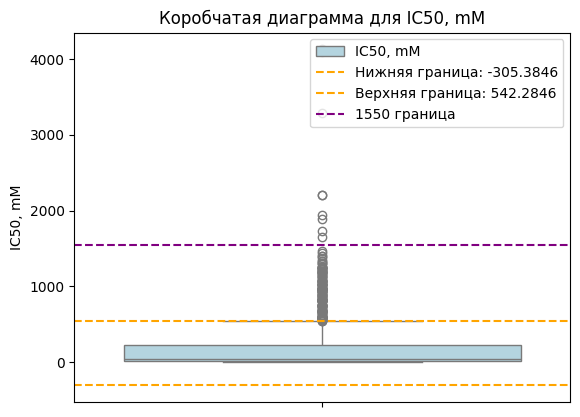

In [43]:
# Вычисляем квартильные значения и межквартильный размах (IQR)
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

# Устанавливаем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Создаем коробчатую диаграмму
sns.boxplot(y=df[target_column], color='lightblue', label=target_column)

# Добавляем горизонтальные линии для границ с новыми цветами
plt.axhline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
plt.axhline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
plt.axhline(1550, color='purple', linestyle='--', label='1550 граница')

# Настраиваем заголовок и легенду
plt.title(f'Коробчатая диаграмма для {target_column}')
plt.legend()

# Отображаем график
plt.show()

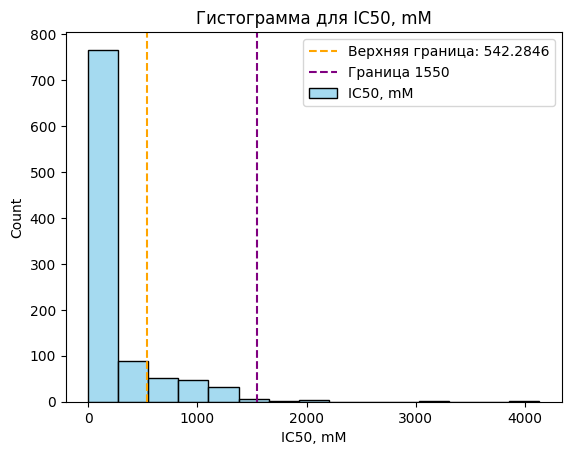

In [44]:
# Создаем гистограмму для целевого столбца
sns.histplot(df[target_column], label=target_column, bins=15, color='skyblue')

# Настраиваем заголовок гистограммы
plt.title(f'Гистограмма для {target_column}')

# Добавляем вертикальные линии для верхней границы и 1550 границы
plt.axvline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
plt.axvline(1550, color='purple', linestyle='--', label='Граница 1550')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

In [45]:
# Подсчет количества значений выше границ
count_higher_than_upper_bound = df[df[target_column] > upper_bound].shape[0]
count_extreme = df[df[target_column] > 1550].shape[0]

print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"%: {count_higher_than_upper_bound / df.shape[0] * 100:.4f}")
print(f"Количество значений выше 1550: {count_extreme}. "
      f"%: {count_extreme / df.shape[0] * 100:.4f}")


Количество значений выше верхней границы: 145. %: 14.5291
Количество значений выше 1550: 9. %: 0.9018


In [46]:
# Фильтрация значений не входящих в границы
df_filtered = df[df[target_column] <= 1550]

In [47]:
# Корреляционный анализ
def analyze_correlations(dataframe, target_column, correlation_threshold=0.2):
    """Функция для анализа корреляций с заданным порогом."""
    correlations = dataframe.corr()[target_column]
    significant_correlations = {column: correlation for column, correlation in correlations.items()
                                if column != target_column and abs(correlation) >= correlation_threshold}
    print (f'корреляции между {target_column}')
    for col, corr in significant_correlations.items():
        print(f"и {col} составляет: {corr:.4f} ")

    return significant_correlations

In [48]:
corr_map = analyze_correlations(df_filtered, target_column)
print("Сильно коррелирующие столбцы:", corr_map)

корреляции между IC50, mM
и CC50, mM составляет: 0.4124 
и MinEStateIndex составляет: -0.2532 
и Chi2n составляет: -0.2280 
и Chi2v составляет: -0.2292 
и Chi3n составляет: -0.2148 
и Chi3v составляет: -0.2180 
и Chi4n составляет: -0.2203 
и Chi4v составляет: -0.2249 
и PEOE_VSA7 составляет: -0.2303 
и SMR_VSA4 составляет: -0.2149 
и SlogP_VSA5 составляет: -0.2383 
и EState_VSA8 составляет: -0.2113 
и VSA_EState4 составляет: -0.2820 
и VSA_EState7 составляет: -0.2131 
и NumAliphaticCarbocycles составляет: -0.2279 
и NumSaturatedCarbocycles составляет: -0.2071 
и NumSaturatedHeterocycles составляет: 0.2117 
и fr_alkyl_halide составляет: 0.2363 
Сильно коррелирующие столбцы: {'CC50, mM': 0.412390273519433, 'MinEStateIndex': -0.2531713980945361, 'Chi2n': -0.22797285291620992, 'Chi2v': -0.2292406110792481, 'Chi3n': -0.21477790678186384, 'Chi3v': -0.21797692330557297, 'Chi4n': -0.22027612965903975, 'Chi4v': -0.22487720390152174, 'PEOE_VSA7': -0.23028200902054208, 'SMR_VSA4': -0.214854005594

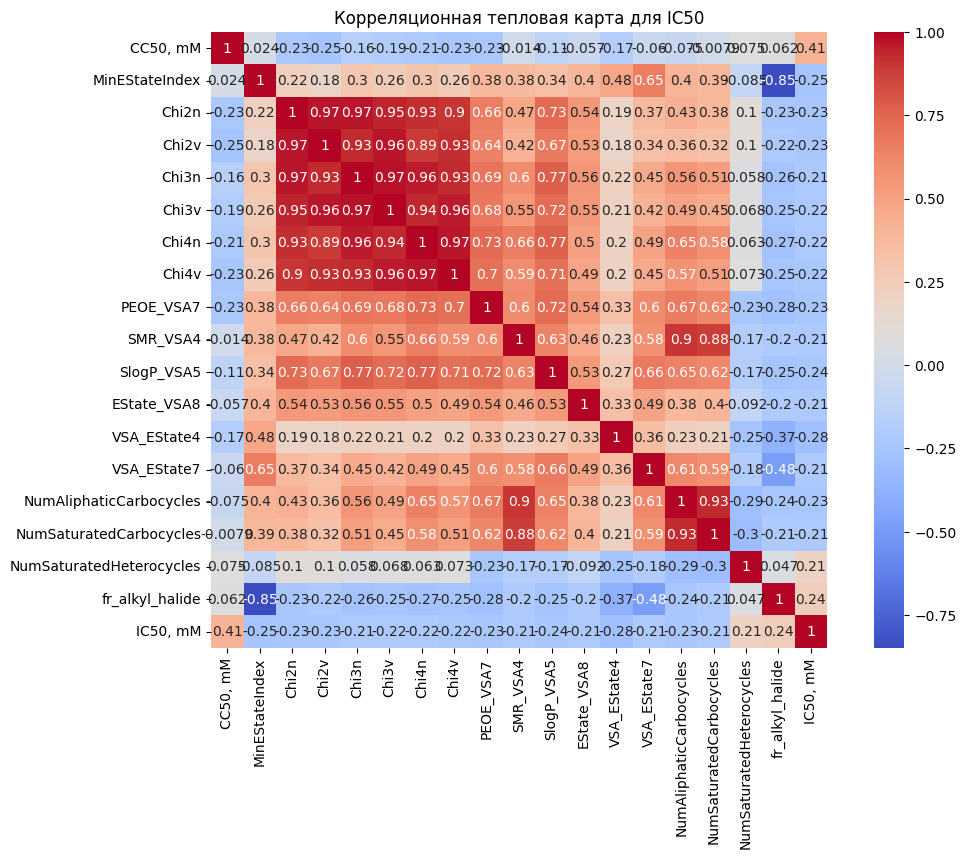

In [49]:
# Визуализация корреляций
df_filtered_corr = df_filtered[list(corr_map.keys()) + [target_column]]
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered_corr.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная тепловая карта для IC50')
plt.show()

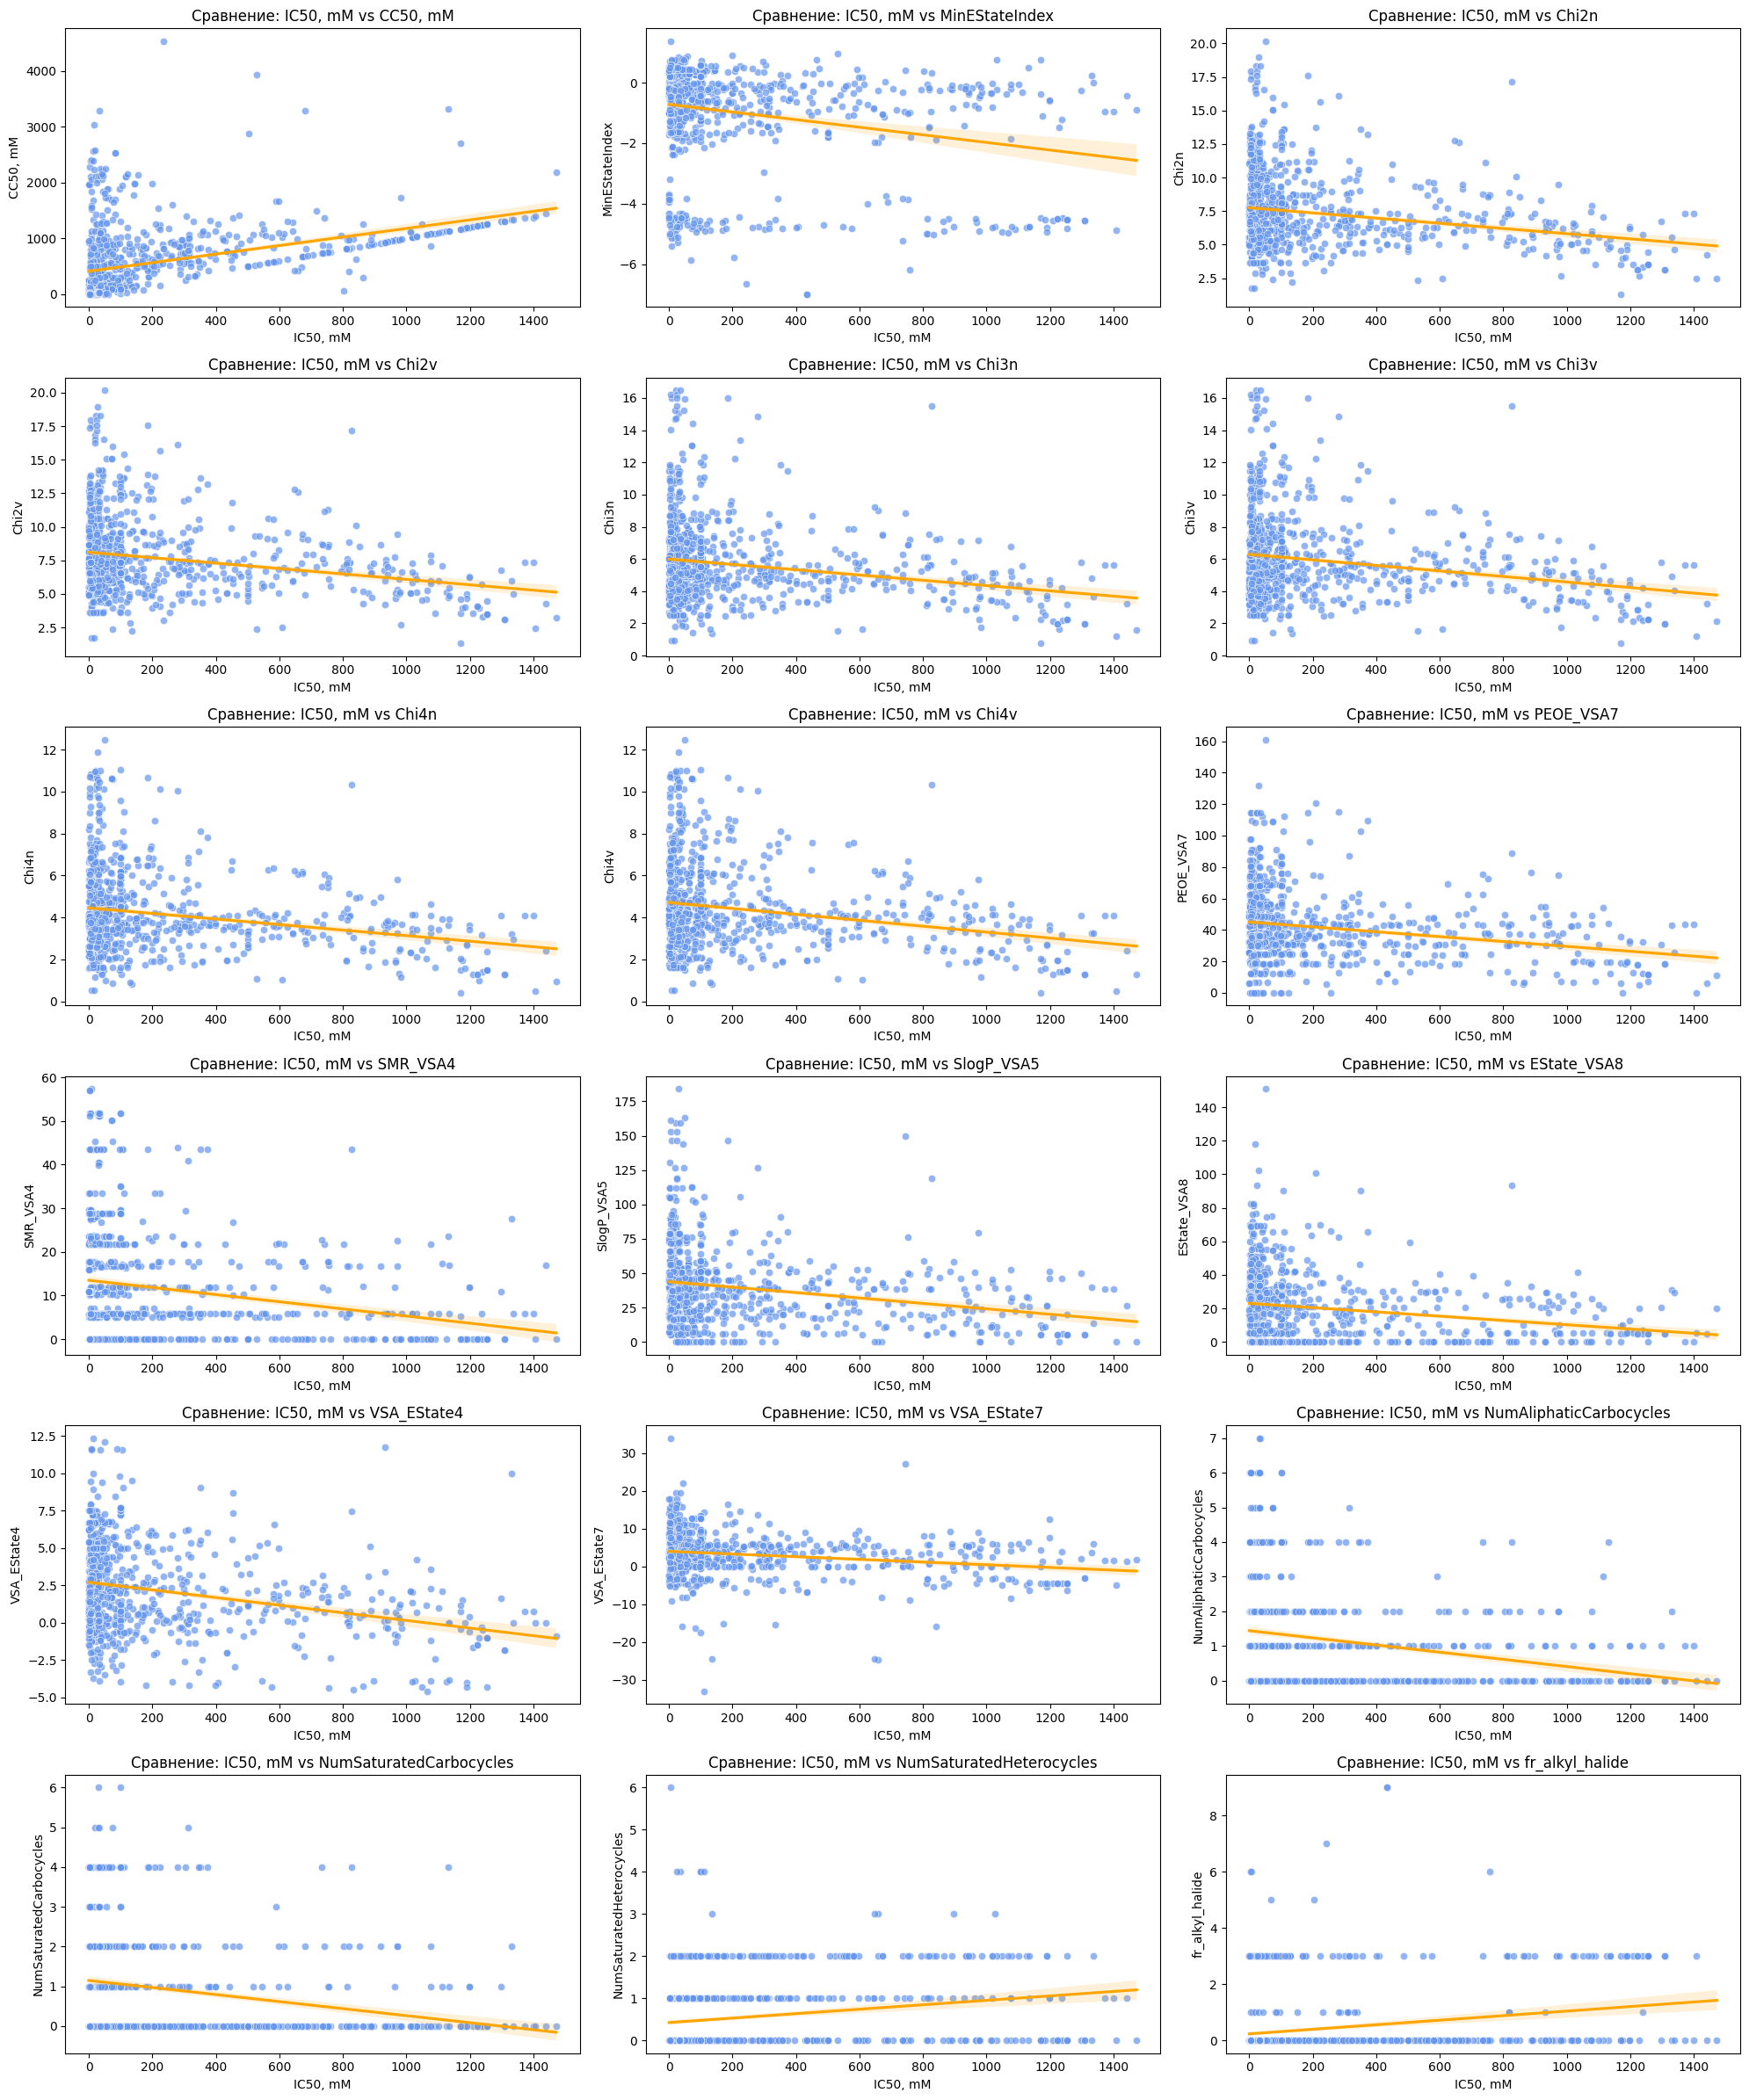

In [50]:
# Функция для построения диаграмм разброса
def draw_scatterplots(dataframe, target_column, corr_dict):
    """Функция для рисования диаграмм разброса для коррелирующих признаков."""
    # Определяем размерность фигуры на основе количества подграфиков
    x_size = 3
    y_size = (len(corr_dict) + x_size - 1) // x_size
    fig, axes = plt.subplots(y_size, x_size, figsize=(20, y_size * 4))
    axes = axes.flatten()

    # Проходимся по каждому из коррелирующих признаков
    for i, (col, _) in enumerate(corr_dict.items()):
        sns.scatterplot(data=dataframe, x=target_column, y=col, ax=axes[i], color='cornflowerblue', alpha=0.7)
        axes[i].set_title(f'Сравнение: {target_column} vs {col}')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(col)

        # Добавляем линию регрессии для дополнительных данных
        sns.regplot(data=dataframe, x=target_column, y=col, ax=axes[i], scatter=False, color='orange')

    # Удаляем пустые подграфики, если они есть
    for j in range(len(corr_dict), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Применяем функцию для построения диаграмм разброса
draw_scatterplots(df_filtered, target_column, corr_map)

При проведении корреляционного анализа было установлено, что наш целевой признак в основном коррелирует с рядом других признаков, однако уровень этой корреляции, как правило, низкий:

### Цитотоксичность

- CC50 (мМ): Концентрация, при которой погибает 50% клеток. Представляет собой меру токсичности соединения.

### Электронные дескрипторы

- MinEStateIndex: Минимальное значение электронного состояния среди всех атомов молекулы. Этот дескриптор характеризует наиболее электронодефицитные атомы и показывает:
  - Потенциальные электрофильные центры
  - Склонность к нуклеофильной атаке
  - Реакционную способность молекулы

### Молекулярные дескрипторы связности (Connectivity Chi indices)

Эти дескрипторы основаны на топологии молекулярного графа и характеризуют форму и разветвленность молекулы:

- Chi2n: Простое соединительное число второго порядка. Описывает локальную связность через 2 связи, что позволяет охарактеризовать короткие разветвления в структуре.
- Chi2v: Валентно-взвешенный вариант Chi2n, учитывающий электрохимические свойства атомов. Более чувствителен к гетероатомам.
- Chi3n: Простое соединительное число третьего порядка, описывающее средние структурные мотивы (через 3 связи). Характеризует степень разветвления.
- Chi3v: Валентно-взвешенный вариант Chi3n, отражающий электронное окружение в средних фрагментах.
- Chi4n: Простое соединительное число четвертого порядка, которое описывает крупные структурные паттерны и характеризует общую архитектуру молекулы.
- Chi4v: Валентно-взвешенный вариант Chi4n, который отражает дальнодействующие электронные эффекты.

### Биологическое значение Chi-индексов: Связь с биологической активностью

#### VSA-дескрипторы (Van der Waals Surface Area)

- PEOE_VSA7: Площадь поверхности атомов с парциальными зарядами в определенном диапазоне (по методу PEOE - Partial Equalization of Orbital Electronegativity). Этот дескриптор характеризует электростатические свойства молекулы и воздействует на взаимодействие с биологическими мишенями.
- SMR_VSA4: Площадь поверхности, взвешенная по молекулярной рефракции (SMR - Molar Refractivity). Отражает поляризуемость и объемные свойства молекулы, а также связан со способностью к π-π взаимодействиям.
- SlogP_VSA5: Площадь поверхности, взвешенная по липофильности (SlogP). Этот дескриптор характеризует гидрофобные области молекулы и критичен для проницаемости через мембраны и связывания с белками.
- EState_VSA8: Площадь поверхности, взвешенная по электронному состоянию атомов (EState). Комбинирует электронные и топологические свойства, важна для реакционной способности.
- VSA_EState4, VSA_EState7: Площади поверхности атомов в различных диапазонах электронных состояний, описывающие электронное распределение в молекуле и влияющие на селективность связывания.

### Структурные дескрипторы

- NumAliphaticCarbocycles: Количество алифатических карбоциклов (насыщенные кольца из углерода). Влияет на конформационную жесткость и липофильность, что критично для связывания в гидрофобных карманах белков.
- NumSaturatedCarbocycles: Количество насыщенных углеродных циклов, характеризующих структурную жесткость молекулы и влияющих на энтропийные факторы связывания.
- NumSaturatedHeterocycles: Количество насыщенных гетероциклов (кольца с N, O, S), обеспечивающих водородные связи и полярные взаимодействия. Это критично для специфичности к биологическим мишеням.

### Функциональные группы

- fr_alkyl_halide: Количество алкилгалогенидных фрагментов (R-X, где X = F, Cl, Br, I). Влияет на реакционную способность и метаболизм, так как может образовывать ковалентные связи с белками. Эти фрагменты имеют большое значение для фармакокинетики, так как они чаще всего метаболически лабильны.



В рамках этих групп наблюдается взаимная корреляция на достаточно высоком уровне. Особо стоит отметить, что MinEStateIndex имеет значительную корреляцию с fr_alkyl_halide, что указывает на то, что именно алкилгалогенидные фрагменты обладают минимальным электронным состоянием.

## **Анализ CC50**

In [51]:
target_column = 'CC50, mM'
# Описательная статистика
descriptive_stats = df[target_column].describe()
print(descriptive_stats)

count     998.000000
mean      586.668414
std       642.016454
min         0.700808
25%        99.999036
50%       408.793314
75%       891.770961
max      4538.976189
Name: CC50, mM, dtype: float64


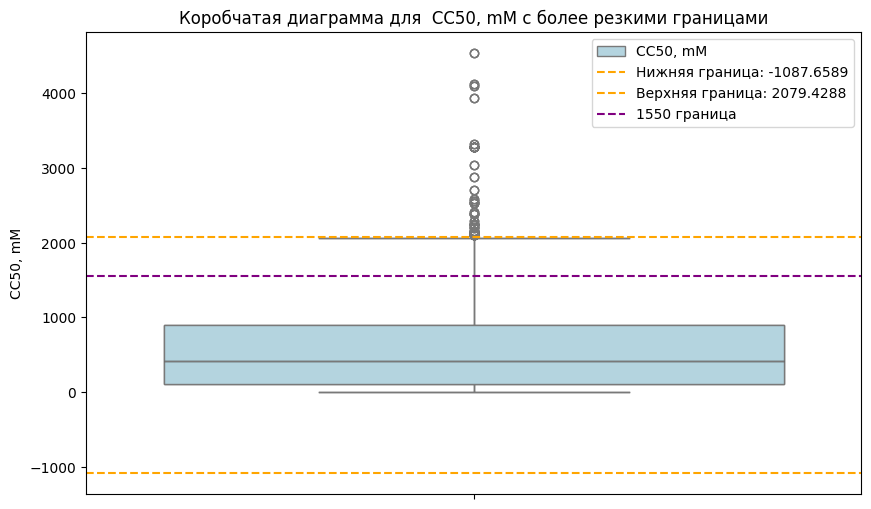

In [52]:
# Вычисляем квартильные значения и межквартильный размах (IQR)
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1


# Устанавливаем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Визуализация выбросов с помощью Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df[target_column])

sns.boxplot(y=df[target_column], color='lightblue', label=target_column)

plt.axhline(lower_bound, color='orange', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
plt.axhline(upper_bound, color='orange', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
plt.axhline(1550, color='purple', linestyle='--', label='1550 граница')
plt.title(f'Коробчатая диаграмма для  {target_column} с более резкими границами')
plt.legend()
plt.show()

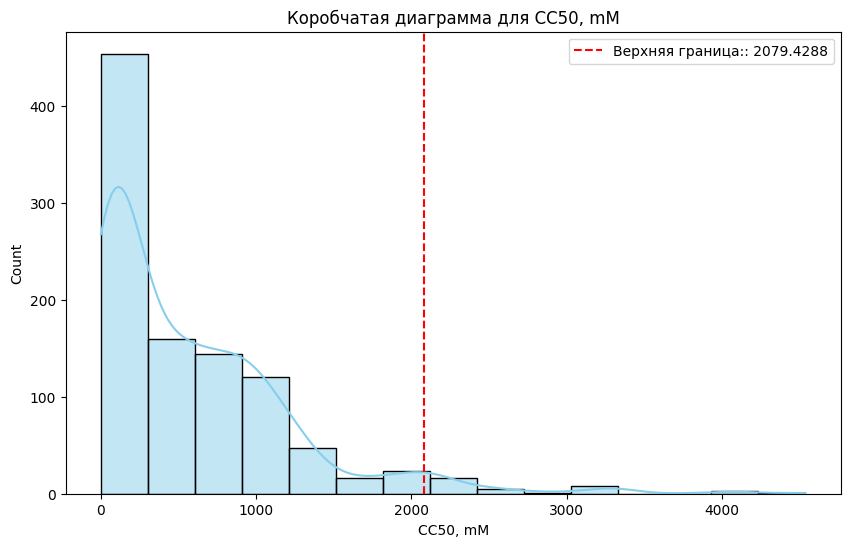

In [53]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df[target_column], bins=15, color='skyblue', kde=True)
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница:: {upper_bound:.4f}')
plt.title(f'Коробчатая диаграмма для {target_column}')
plt.legend()
plt.show()

In [54]:
# Подсчет значений выше верхней границы
count_higher_than_upper_bound = df[df[target_column] > upper_bound].shape[0]
print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"Процент: {count_higher_than_upper_bound / df.shape[0] * 100:.4f}%")

Количество значений выше верхней границы: 39. Процент: 3.9078%


На представленных графиках наблюдаются выбросы в значениях CC50. Выбросами считаются значения, превышающие 2079.4288. В данном наборе данных таких записей всего 39.

In [55]:
# Фильтрация данных для анализа корреляции
df_cc50 = df[df[target_column] <= upper_bound]

In [56]:
# Создание карты корреляции
cc50_corr_map = analyze_correlations(df_cc50, target_column, 0.2)
df_cc50_corr = df_cc50[list(cc50_corr_map.keys())]

корреляции между CC50, mM
и IC50, mM составляет: 0.5368 
и MolWt составляет: -0.2186 
и HeavyAtomMolWt составляет: -0.2152 
и ExactMolWt составляет: -0.2185 
и NumValenceElectrons составляет: -0.2156 
и FpDensityMorgan1 составляет: 0.2384 
и FpDensityMorgan2 составляет: 0.2208 
и Chi0 составляет: -0.2203 
и Chi0n составляет: -0.2112 
и Chi0v составляет: -0.2164 
и Chi1 составляет: -0.2180 
и Chi1n составляет: -0.2136 
и Chi1v составляет: -0.2230 
и Chi2v составляет: -0.2079 
и Kappa1 составляет: -0.2202 
и Kappa2 составляет: -0.2271 
и Kappa3 составляет: -0.2283 
и LabuteASA составляет: -0.2235 
и PEOE_VSA7 составляет: -0.2161 
и VSA_EState4 составляет: -0.2298 
и HeavyAtomCount составляет: -0.2186 
и MolMR составляет: -0.2268 
и fr_NH2 составляет: -0.2197 


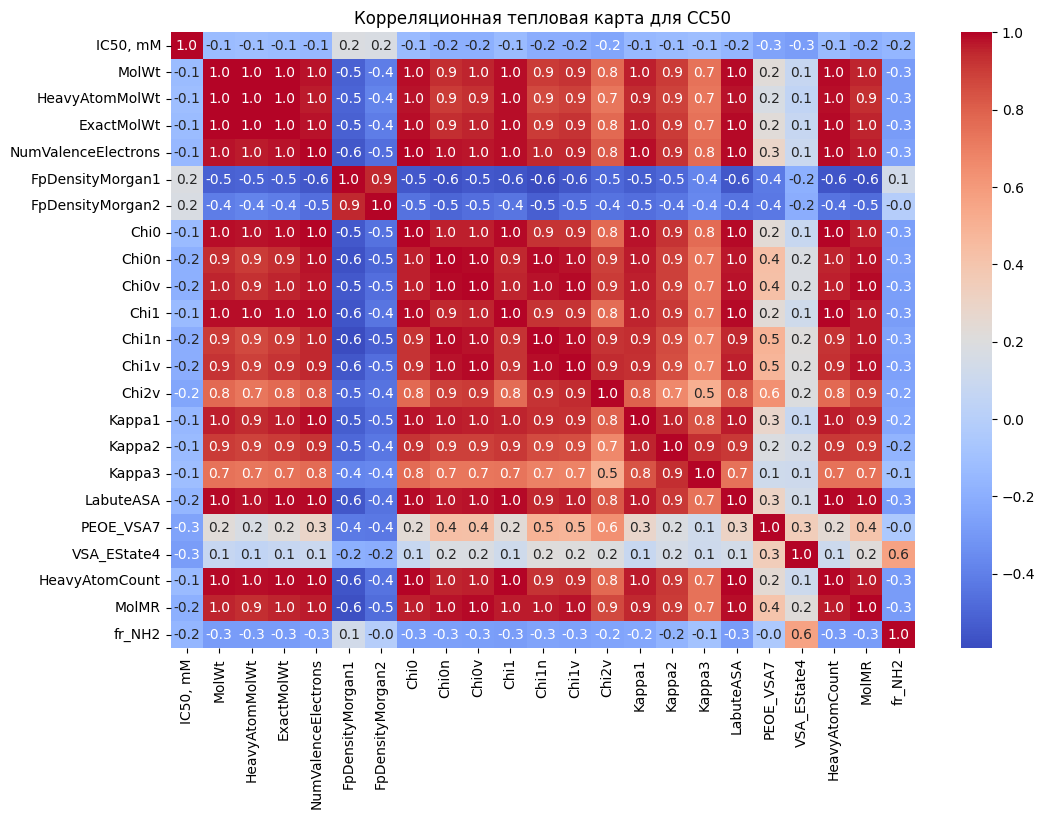

In [57]:
# Визуализация тепловой карты корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(df_cc50_corr.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Корреляционная тепловая карта для CC50')
plt.show()

In [58]:
# Анализ корреляции
correlation_results = df_cc50_corr.corr()
print(correlation_results)

                     IC50, mM     MolWt  HeavyAtomMolWt  ExactMolWt  \
IC50, mM             1.000000 -0.132369       -0.116703   -0.132256   
MolWt               -0.132369  1.000000        0.996789    0.999998   
HeavyAtomMolWt      -0.116703  0.996789        1.000000    0.996757   
ExactMolWt          -0.132256  0.999998        0.996757    1.000000   
NumValenceElectrons -0.145815  0.980603        0.965283    0.980828   
FpDensityMorgan1     0.185068 -0.515709       -0.499799   -0.516002   
FpDensityMorgan2     0.178228 -0.407995       -0.383303   -0.408373   
Chi0                -0.137279  0.986143        0.977318    0.986357   
Chi0n               -0.189647  0.933322        0.903744    0.933555   
Chi0v               -0.190855  0.952170        0.926323    0.952242   
Chi1                -0.135993  0.986658        0.981489    0.986811   
Chi1n               -0.202590  0.900733        0.865738    0.900947   
Chi1v               -0.201853  0.923340        0.893529    0.923380   
Chi2v 

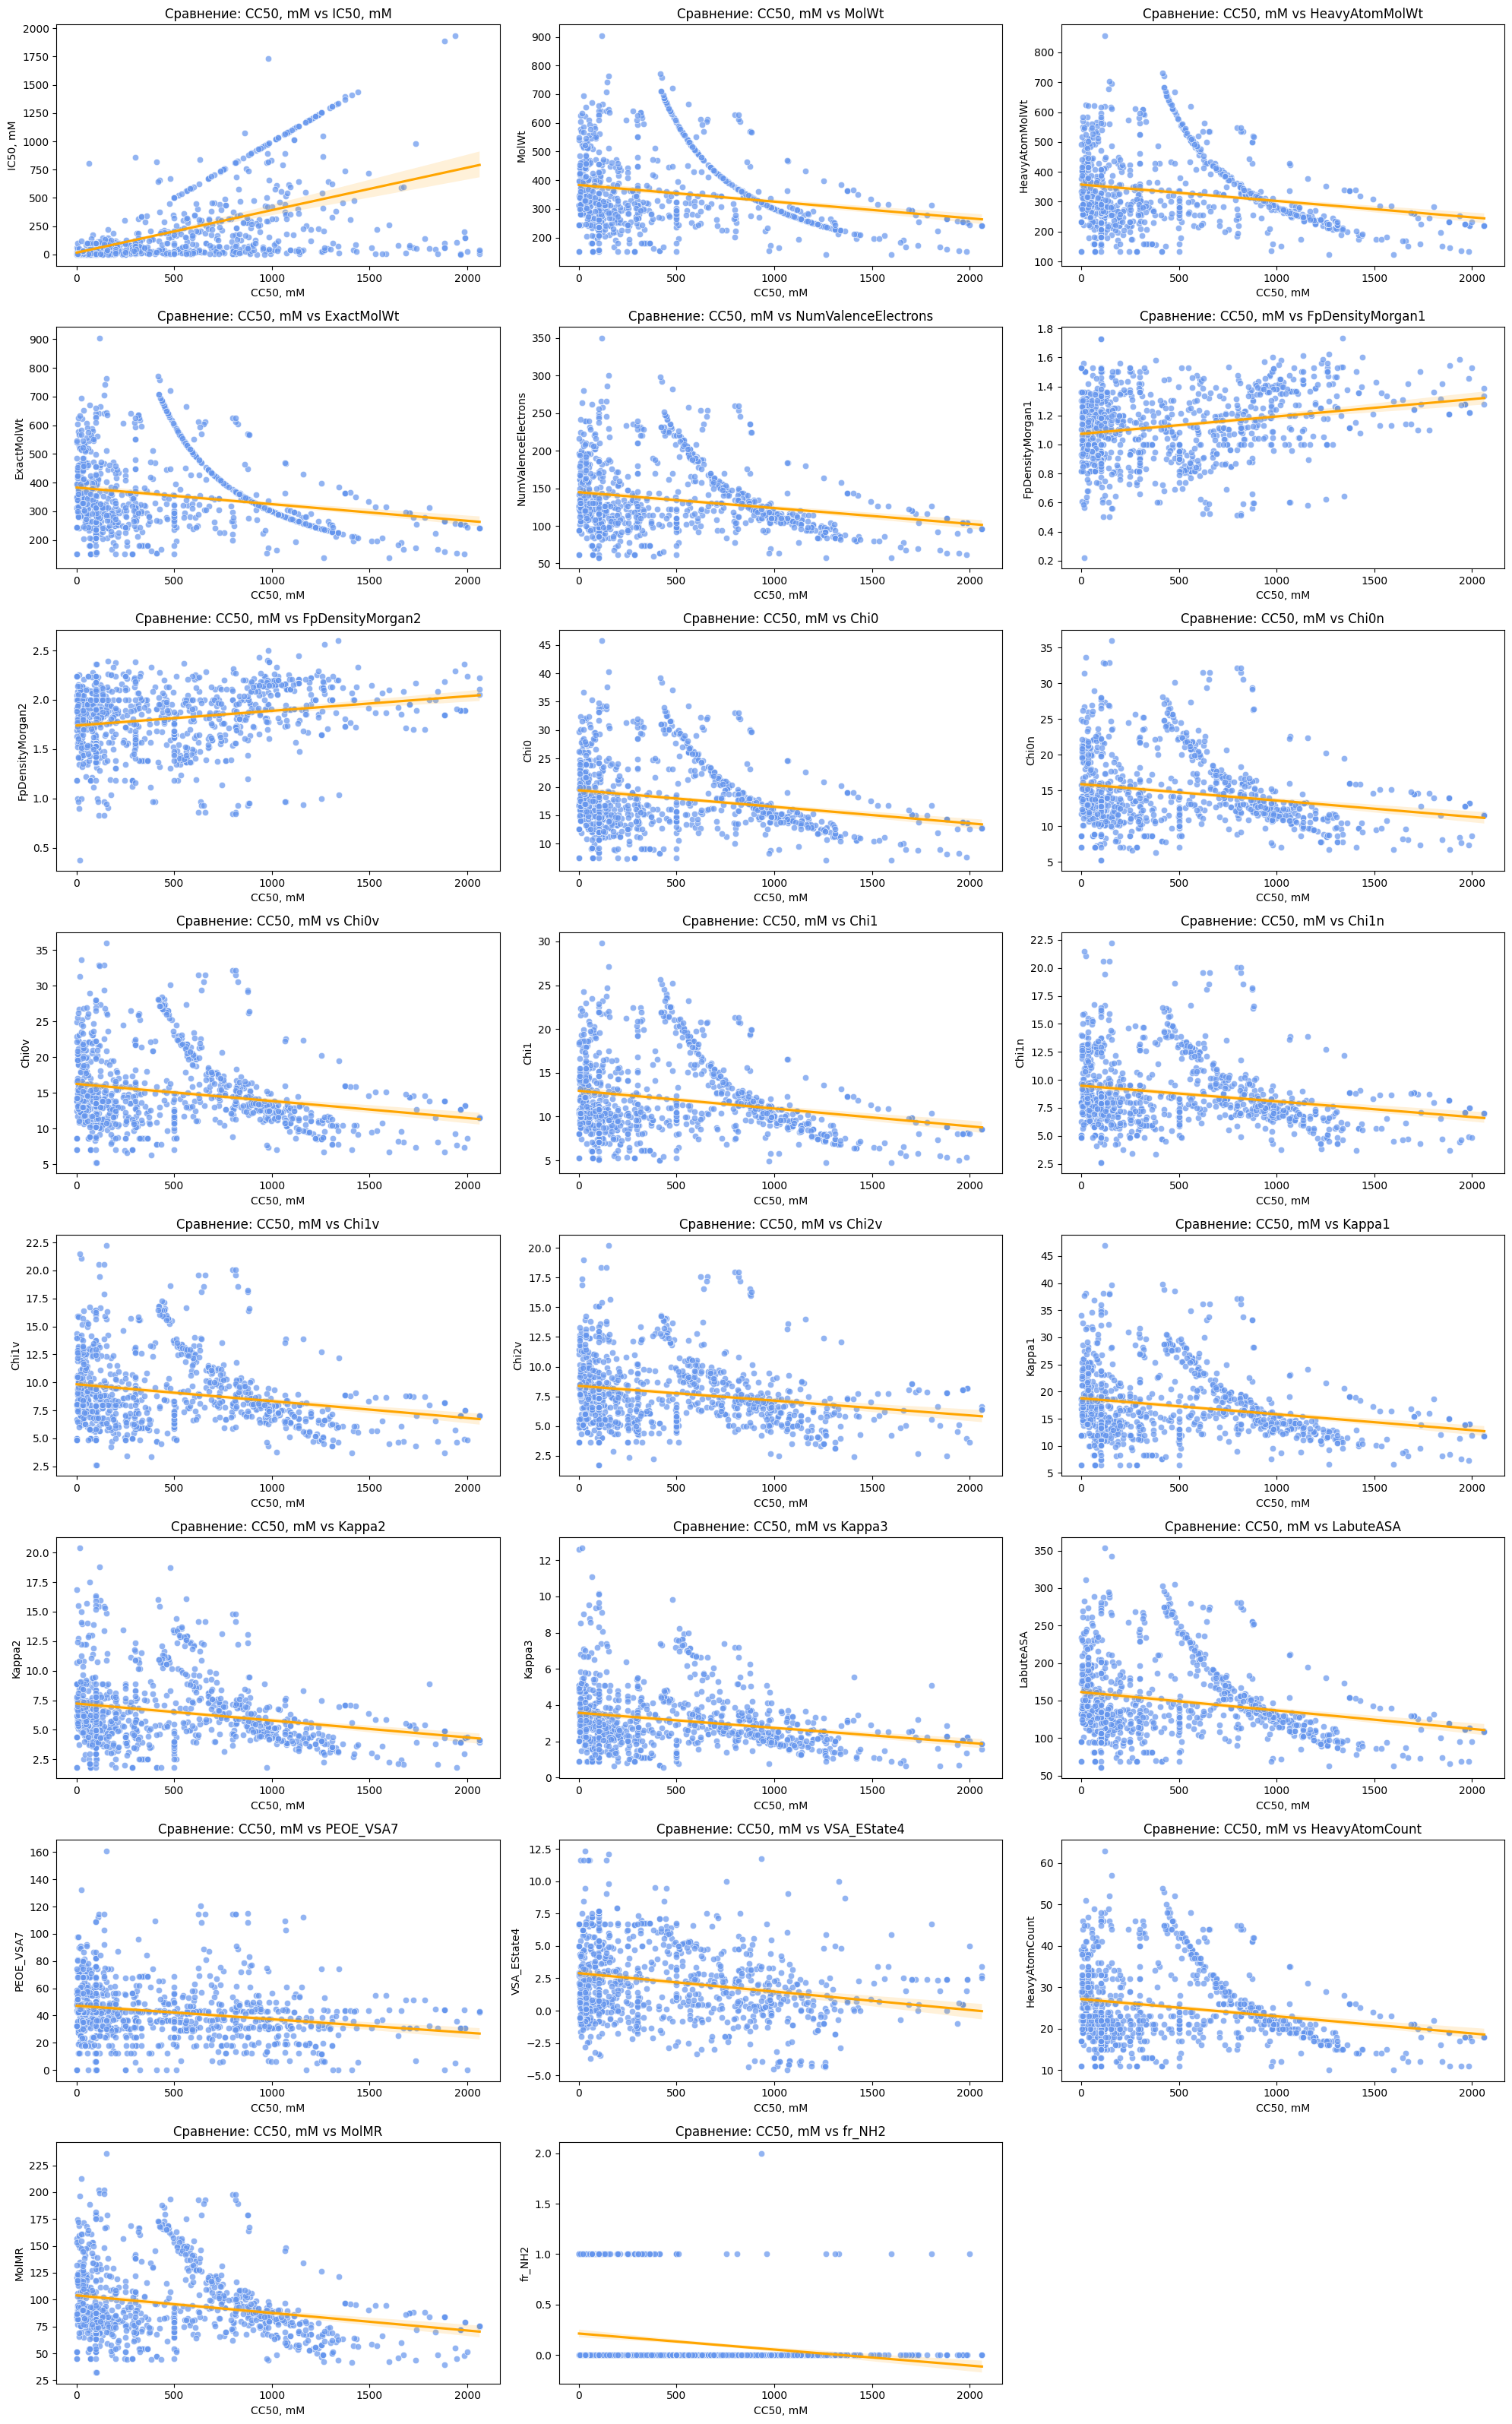

In [59]:
# Построение диаграмм разброса для коррелирующих признаков
draw_scatterplots(dataframe=df_cc50, target_column=target_column, corr_dict=cc50_corr_map)

### Анализ корреляции признака CC50

Признак CC50 коррелирует с рядом других признаков, которые не были представлены ранее. Вот их краткое описание:

#### Молекулярная масса и атомные характеристики:

- MolWt (Молекулярная масса): Это базовый дескриптор размера молекулы, который влияет на биодоступность и коррелирует с проницаемостью через мембраны.

- HeavyAtomMolWt: Молекулярная масса тяжелых атомов (исключая водород). Этот показатель более точно отражает "эффективную массу" соединения, что важно для объемных взаимодействий с белками.

- ExactMolWt: Точная молекулярная масса с учетом изотопов. Этот параметр играет критическую роль в масс-спектрометрии и аналитическом контроле.

- NumValenceElectrons: Общее количество валентных электронов, характеризующее электронную плотность молекулы. Этот показатель влияет на поляризуемость и взаимодействия с другими молекулами.

#### Дескрипторы плотности отпечатков (Fingerprint Density):

- FpDensityMorgan1 и FpDensityMorgan2: Плотность молекулярных отпечатков Morgan радиуса 1 и 2. Эти показатели отражают структурное разнообразие в окрестности атомов, характеризуя топологическую сложность молекулы:
  - Morgan1 — ближайшие соседи
  - Morgan2 — соседи второго порядка

#### Chi-индексы нулевого порядка:

- Chi0: Простой индекс связности порядка 0, характеризующий общую связность без учета путей. Этот индекс связан с размером молекулы.

- Chi0n: Нормализованная версия Chi0, учитывающая только топологическую структуру.

- Chi0v: Валентно-взвешенная версия Chi0, учитывающая электронные свойства атомов и чувствительная к гетероатомам.

#### Каппа-дескрипторы (Kappa Shape Indices):

- Kappa1 (Первый порядок): Характеризует степень разветвления молекулы. Высокие значения указывают на линейные молекулы, а низкие — на сферические или разветвленные.

- Kappa2 (Второй порядок): Описывает промежуточную форму молекулы, различая разветвленные и циклические структуры.

- Kappa3 (Третий порядок): Характеризует общую молекулярную форму и наиболее чувствителен к глобальной архитектуре молекулы.

#### Поверхностные дескрипторы:

- LabuteASA (Labute Accessible Surface Area): Доступная поверхность по методу Labute. Этот дескриптор аппроксимирует молекулярную поверхность через 2D-структуру и коррелирует с растворимостью.

#### Атомные счетчики:

- HeavyAtomCount: Количество тяжелых атомов. Это основной дескриптор размера молекулы, который влияет на сложность синтеза соединений.

#### Физико-химические свойства:

- MolMR (Molar Refractivity): Молярная рефракция, являющаяся мерой поляризуемости и объема молекулы. Этот параметр связан с дисперсионными взаимодействиями.

#### Функциональные группы:

- fr_NH2: Количество первичных аминогрупп (-NH₂). Этот дескриптор характеризует основность молекулы и ее способность к водородным связям (как донор, так и акцептор), а также влияет на растворимость в воде и проницаемость.



Из проведенного анализа видно, что значительное количество признаков имеет сильную корреляцию друг с другом, что может быть полезно для дальнейшей работы и интерпретации данных.

## **Анализ SI**

In [60]:
# Описательная статистика
target_column = 'SI'
print("Описательная статистика для SI:")
print(df[target_column].describe())

Описательная статистика для SI:
count      998.000000
mean        72.650005
std        685.504279
min          0.011489
25%          1.457233
50%          3.856410
75%         16.525000
max      15620.600000
Name: SI, dtype: float64


In [61]:
# Фильтрация данных по IC50 и CC50
df_si = df[(df['IC50, mM'] <= 1550) & (df['CC50, mM'] <= upper_bound)]

In [62]:
# Описательная статистика после фильтрации
print("Статистика после фильтрации SI:")
print(df_si[target_column].describe())

Статистика после фильтрации SI:
count      956.000000
mean        72.132600
std        699.829004
min          0.011489
25%          1.427262
50%          3.629536
75%         14.555643
max      15620.600000
Name: SI, dtype: float64


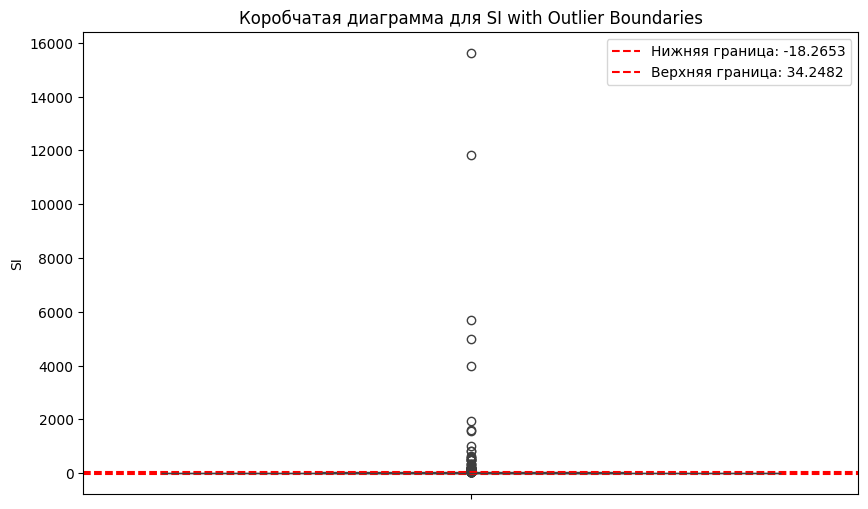

In [63]:
# Вычисление границ для выявления выбросов
Q1 = df_si[target_column].quantile(0.25)
Q3 = df_si[target_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Визуализация выбросов с помощью Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_si[target_column])
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Нижняя граница: {lower_bound:.4f}')
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
plt.title(f'Коробчатая диаграмма для {target_column} with Outlier Boundaries')
plt.legend()
plt.show()

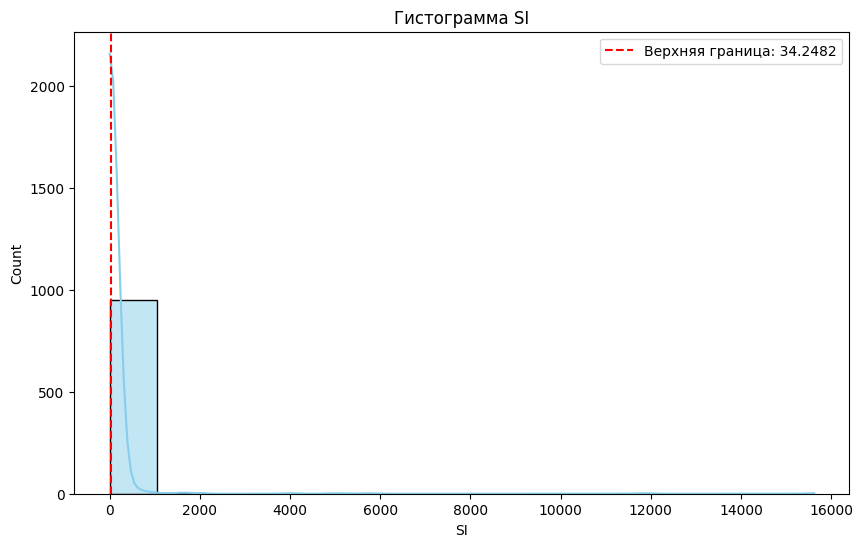

In [64]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df_si[target_column], bins=15, color='skyblue', kde=True)
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница: {upper_bound:.4f}')
plt.title(f'Гистограмма {target_column}')
plt.legend()
plt.show()

In [65]:
# Подсчет значений выше верхней границы
count_higher_than_upper_bound = df_si[df_si[target_column] > upper_bound].shape[0]
print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. "
      f"Процент: {count_higher_than_upper_bound / df_si.shape[0] * 100:.4f}%")

Количество значений выше верхней границы: 120. Процент: 12.5523%


In [66]:
# Фильтрация данных для анализа корреляции
df_si = df_si[df_si[target_column] <= upper_bound]

# Создание карты корреляции
si_corr_map = analyze_correlations(df_si, target_column, 0.2)
df_si_corr = df_si[list(si_corr_map.keys())]


корреляции между SI
и IC50, mM составляет: -0.3782 
и fr_Imine составляет: 0.2353 


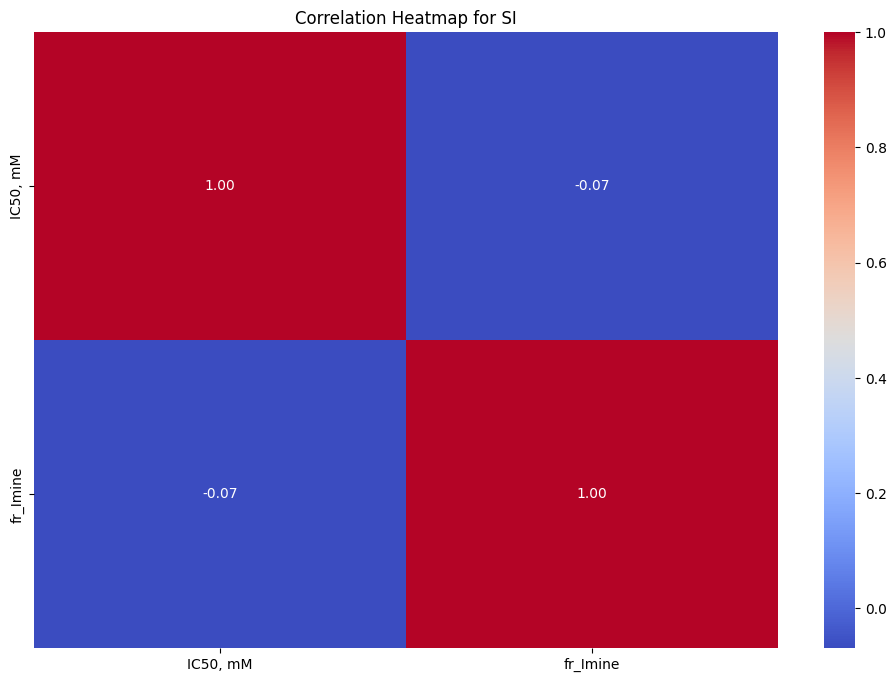

In [67]:
# Визуализация тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(df_si_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for SI')
plt.show()

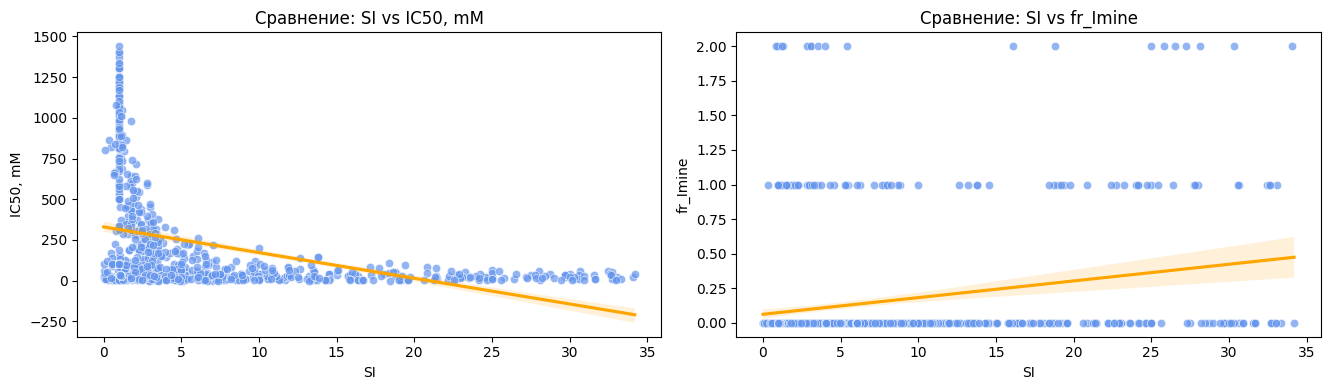

In [68]:
# Построение диаграмм разброса для коррелирующих признаков
draw_scatterplots(dataframe=df_si, target_column=target_column, corr_dict=si_corr_map)

Корреляционный анализ показывает, что признак SI имеет значимую корреляцию только с IC50 и fr_Imine.

fr_Imine — это дескриптор, который подсчитывает количество иминных групп в молекуле. Он указывает на:

- Потенциал ковалентного связывания
- Реакционную способность молекулы
- Метаболическую лабильность
- Необходимость дополнительной оценки безопасности